In [1]:
%matplotlib inline 
import matplotlib.pylab as plt 
import numpy as np 

import sys 
sys.path.append('../code_Boyle/')
import CRISPR_dCas9_binding_curve_Boyle as dCas9
reload(dCas9);

import seaborn as sns 
sns.set_style('ticks')


from scipy import linalg


import Cas9_FRET as FRET 
reload(FRET);

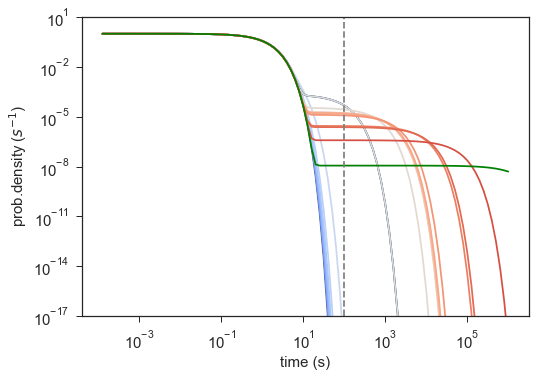

In [2]:
model_id = 'init_limit_general_energies_v2'
filename = '../data/25_10_2018/median_landscape_Boyle_kSP_0_25.txt'
boyle_params = np.loadtxt(filename,comments='#')

sns.set_palette('coolwarm',20)



for mm1 in range(1,21):
    mismatch_positions = [i for i in range(mm1,21)]        
    dwelltime_dist, times = FRET.dwelltime_distribution(boyle_params, model_id, mismatch_positions, guide_length=20) 
    if mm1 == 11:
        plt.loglog(times, dwelltime_dist, label=str(mm1),color='black')
    if mm1 == 1:
        plt.loglog(times, dwelltime_dist, label=str(mm1),color='grey')
    else:
        plt.loglog(times, dwelltime_dist, label=str(mm1))


    
dwelltime_dist, times = FRET.dwelltime_distribution(boyle_params, model_id, mismatch_positions=[], guide_length=20) 
plt.semilogy(times, dwelltime_dist, label='on-target',color='green');
# plt.legend(fontsize=15, ncol=5)
plt.xlabel('time (s)', fontsize=15);
plt.ylabel('prob.density ($s^{-1}$)', fontsize=15);
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);
# plt.xlim(0,10)
plt.ylim(10**(-17),10.0);

plt.axvline(100., color='grey',linestyle='dashed')

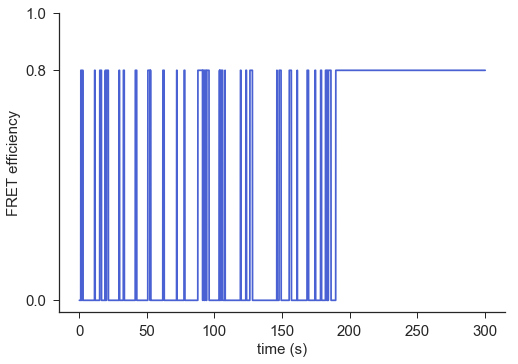

In [3]:
model_id = 'init_limit_general_energies_v2'
filename = '../data/25_10_2018/median_landscape_Boyle_kSP_0_25.txt'
boyle_params = np.loadtxt(filename,comments='#')

mismatch_positions = []
filename = 'FRET_trace.txt'

concentration = 10.0 # concentration in nM 

FRET.simulate_FRET_trace(parameters=boyle_params, model_id=model_id,
                   mismatch_positions=mismatch_positions,
                   filename=filename,
                   concentration=concentration,
                   noise_amplitude=0.0)


trace = np.loadtxt(filename)
time = trace[:,0]
FRET = trace[:,1]
state= trace[:,2]

plt.plot(time, FRET)
plt.xticks(fontsize=15)
plt.yticks([0,0.8,1.0],fontsize=15)
plt.xlabel('time (s)', fontsize=15)
plt.ylabel('FRET efficiency', fontsize=15)
sns.despine()

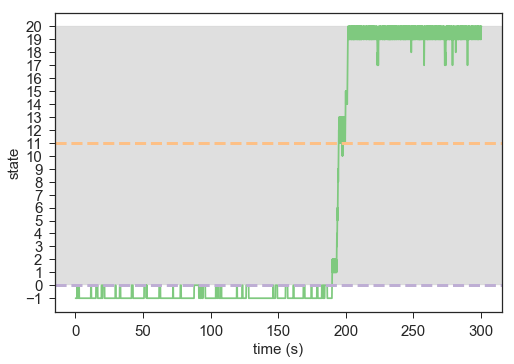

In [4]:
sns.set_palette('Accent')
plt.plot(time, trace[:,2],zorder=2);
plt.xlabel('time (s)',fontsize=15);
plt.ylabel('state',fontsize=15);

plt.axhspan(ymin=0, ymax=20, color='grey',alpha=0.25,zorder=1);
plt.axhline(0, linestyle='dashed',linewidth=3, color=sns.color_palette()[1])
plt.axhline(11, linestyle='dashed',linewidth=3, color=sns.color_palette()[2])

plt.xticks(fontsize=15);
plt.yticks(range(-1,21),fontsize=15);